In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px 
import matplotlib as mpl

import re as re

import seaborn as sns

In [2]:
an = pd.read_csv('Analysis.csv')
an.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 70 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                            --------------  -----  
 0   Are you self-employed?                                                                                                                                                            1433 non-null   int64  
 1   How many employees does your company or organization have?                                                                                                                        876 non-null    object 
 2   Is your employer primarily a tech company/organization?     

# Grouping Physical Category and Graph

36


<Axes: title={'center': 'Bringing up Physical Health issues during an Interview'}, ylabel='Category'>

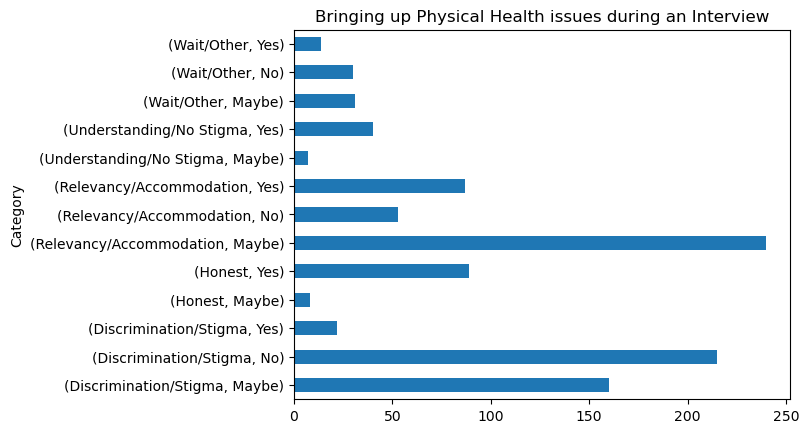

In [5]:
x = an.columns.get_loc('Would you be willing to bring up a physical health issue with a potential employer in an interview?')
print(x)
an.groupby(['Physical Category', an.iloc[:,36]]).size().plot(kind = 'barh', title = 'Bringing up Physical Health issues during an Interview', ylabel= 'Category')

# **Grouping Mental Category and Graph**

40


<Axes: title={'center': 'Bringing up Mental Health issues during an Interview'}, ylabel='Category'>

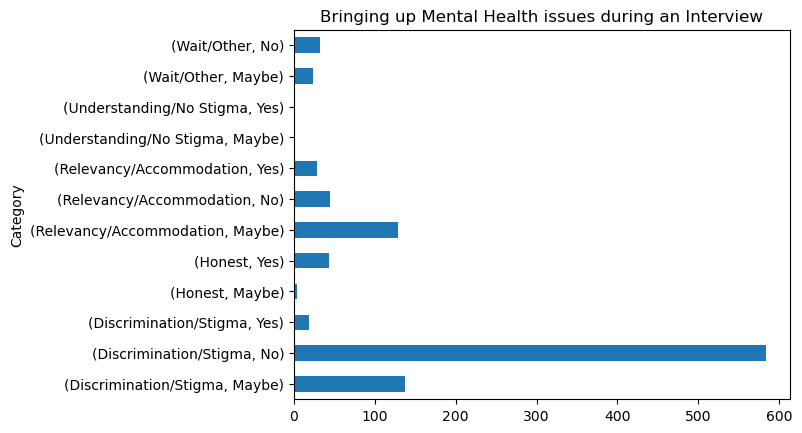

In [6]:
x = an.columns.get_loc('Would you bring up a mental health issue with a potential employer in an interview?')
print(x)
# an.groupby('Physical Category').an['Would you be willing to bring up a physical health issue with a potential employer in an interview?'].count()
# print(an.groupby(['Mental Category', an.iloc[:,40]]).size())
an.groupby(['Mental Category', an.iloc[:,40]]).size().plot(kind = 'barh', title = 'Bringing up Mental Health issues during an Interview', ylabel= 'Category')

# Comparing Physical and Mental Categories

In [13]:
phyGroup = an.groupby(['Physical Category', an.iloc[:,36]]).size()

phyG = phyGroup.to_frame()
phyG = phyG.reset_index()
phyG = phyG.rename(columns={'Physical Category': 'Category'})
phyG['Category'] = phyG['Category'].astype(str) + '-' + phyG['Would you be willing to bring up a physical health issue with a potential employer in an interview?']
phyG = phyG.drop(['Would you be willing to bring up a physical health issue with a potential employer in an interview?'], axis=1)
# phyG.head(50)



mentGroup = an.groupby(['Mental Category', an.iloc[:,40]]).size()
mentG = mentGroup.to_frame()
mentG = mentG.reset_index()
mentG = mentG.rename(columns={'Mental Category': 'Category'})
mentG['Category'] = mentG['Category'].astype(str) + '-' + mentG['Would you bring up a mental health issue with a potential employer in an interview?']
mentG = mentG.drop(['Would you bring up a mental health issue with a potential employer in an interview?'], axis=1)
# mentG.head(50)


In [14]:
resultG = pd.merge(phyG, mentG, how='left',  on="Category")
resultG = resultG.rename(columns={'0_x':'Physical', '0_y':'Mental'})
resultG.fillna(0, inplace=True) 
resultG = resultG.astype({'Mental':int})
# resultG.head(60)




,Category,Physical,Mental
0,Discrimination/Stigma-Maybe,160,137
1,Discrimination/Stigma-No,215,584
2,Discrimination/Stigma-Yes,22,19
3,Honest-Maybe,8,4
4,Honest-Yes,89,43
5,Relevancy/Accommodation-Maybe,240,129
6,Relevancy/Accommodation-No,53,45
7,Relevancy/Accommodation-Yes,87,29
8,Understanding/No Stigma-Maybe,7,1
9,Understanding/No Stigma-Yes,40,1


c:\Users\tyler\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


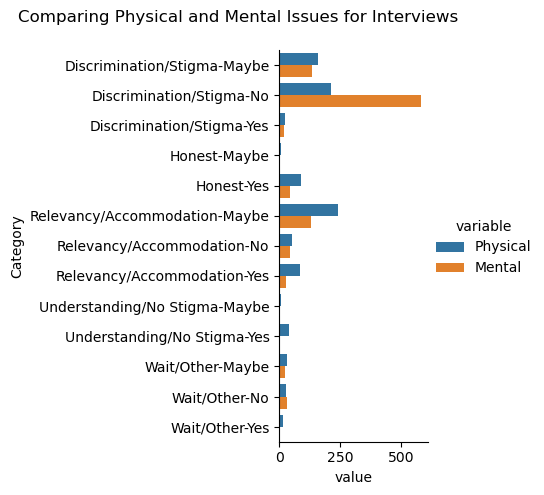

In [15]:
resultG1 = pd.melt(resultG, id_vars = "Category")
# print(result1)

ax = sns.catplot(x = 'value', y='Category', 
            hue = 'variable',data=resultG1, 
            kind='bar',)
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Comparing Physical and Mental Issues for Interviews')
plt.show()

### Comparing Physical and Mental Categories with Gender

c:\Users\tyler\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


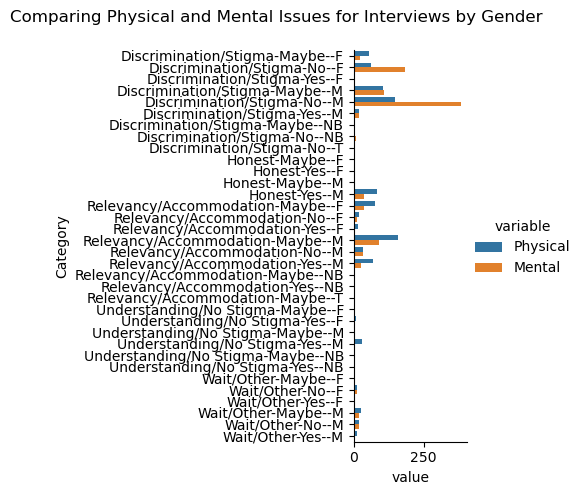

In [19]:
phyGroup_Gender = an.groupby(['Physical Category', 'Gender', an.iloc[:,36]]).size()

phyGG = phyGroup_Gender.to_frame()
phyGG = phyGG.reset_index()
phyGG = phyGG.rename(columns={'Physical Category': 'Category'})
phyGG['Category'] = phyGG['Category'].astype(str) + '-' + phyGG['Would you be willing to bring up a physical health issue with a potential employer in an interview?'] + '--'+ phyGG['Gender']
phyGG = phyGG.drop(['Would you be willing to bring up a physical health issue with a potential employer in an interview?', 'Gender'], axis=1)
# print(phyGG.head(50))

mentGG = an.groupby(['Mental Category', 'Gender', an.iloc[:,40]]).size()
mentGG = mentGG.to_frame()
mentGG = mentGG.reset_index()
mentGG = mentGG.rename(columns={'Mental Category': 'Category'})
mentGG['Category'] = mentGG['Category'].astype(str) + '-' + mentGG['Would you bring up a mental health issue with a potential employer in an interview?'] + '--' + mentGG['Gender']
mentGG = mentGG.drop(['Would you bring up a mental health issue with a potential employer in an interview?', 'Gender'], axis=1)
# print(mentGG.head(50))

resultGG = pd.merge(phyGG, mentGG, how='left',  on="Category")
resultGG = resultGG.rename(columns={'0_x':'Physical', '0_y':'Mental'})
resultGG.fillna(0, inplace=True) 
resultGG = resultGG.astype({'Mental':int})
# print(resultGG.head(60))

resGG = pd.melt(resultGG, id_vars = "Category")
# print(resGG)

axGG = sns.catplot(x = 'value', y='Category', 
            hue = 'variable',data=resGG, 
            kind='bar')
axGG.fig.subplots_adjust(top=0.9)
axGG.fig.suptitle('Comparing Physical and Mental Issues for Interviews by Gender')
plt.show()



##### Gender Omission

c:\Users\tyler\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


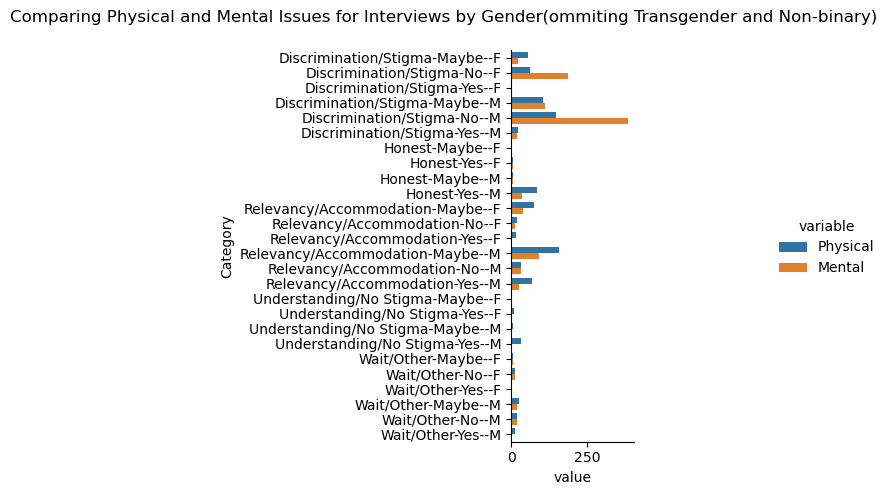

In [20]:
phyGroup_Gender = an.groupby(['Physical Category', 'Gender', an.iloc[:,36]]).size()

phyGG = phyGroup_Gender.to_frame()
phyGG = phyGG.reset_index()
phyGG = phyGG.rename(columns={'Physical Category': 'Category'})
phyGG = phyGG.drop(phyGG[phyGG['Gender'] == 'NB'].index)
phyGG = phyGG.drop(phyGG[phyGG['Gender'] == 'T'].index)
phyGG['Gender'].unique()
phyGG.head(50)
phyGG['Category'] = phyGG['Category'].astype(str) + '-' + phyGG['Would you be willing to bring up a physical health issue with a potential employer in an interview?'] + '--'+ phyGG['Gender']
phyGG = phyGG.drop(['Would you be willing to bring up a physical health issue with a potential employer in an interview?', 'Gender'], axis=1)
# print(phyGG.head(50))

mentGG = an.groupby(['Mental Category', 'Gender', an.iloc[:,40]]).size()
mentGG = mentGG.to_frame()
mentGG = mentGG.reset_index()
mentGG = mentGG.rename(columns={'Mental Category': 'Category'})
mentGG = mentGG.drop(mentGG[mentGG['Gender'] == 'NB'].index)
mentGG = mentGG.drop(mentGG[mentGG['Gender'] == 'T'].index)
mentGG['Gender'].unique()
mentGG['Category'] = mentGG['Category'].astype(str) + '-' + mentGG['Would you bring up a mental health issue with a potential employer in an interview?'] + '--' + mentGG['Gender']
mentGG = mentGG.drop(['Would you bring up a mental health issue with a potential employer in an interview?', 'Gender'], axis=1)
# print(mentGG.head(50))

resultGG = pd.merge(phyGG, mentGG, how='left',  on="Category")
resultGG = resultGG.rename(columns={'0_x':'Physical', '0_y':'Mental'})
resultGG.fillna(0, inplace=True) 
resultGG = resultGG.astype({'Mental':int})
# print(resultGG.head(60))

resGG = pd.melt(resultGG, id_vars = "Category")
# print(result1)

axGG = sns.catplot(x = 'value', y='Category', 
            hue = 'variable',data=resGG, 
            kind='bar')

axGG.fig.subplots_adjust(top=0.9)
axGG.fig.suptitle('Comparing Physical and Mental Issues for Interviews by Gender(ommiting Transgender and Non-binary)')
plt.show()




c:\Users\tyler\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


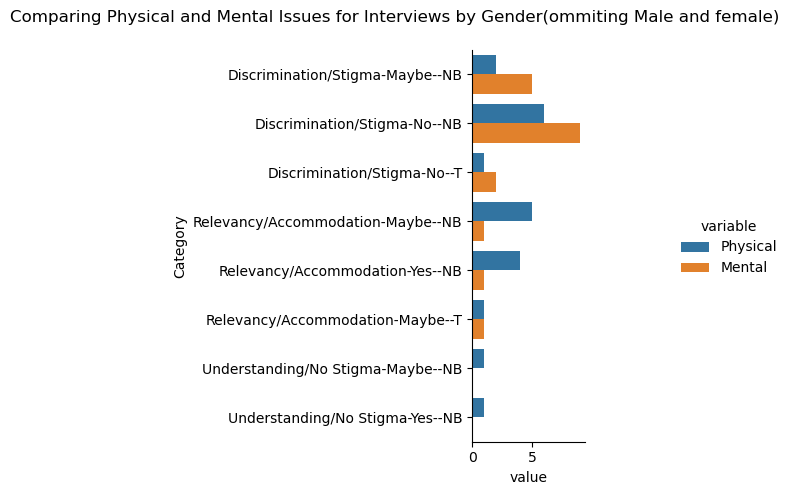

In [21]:
phyGroup_Gender = an.groupby(['Physical Category', 'Gender', an.iloc[:,36]]).size()

phyGG = phyGroup_Gender.to_frame()
phyGG = phyGG.reset_index()
phyGG = phyGG.rename(columns={'Physical Category': 'Category'})
phyGG = phyGG.drop(phyGG[phyGG['Gender'] == 'M'].index)
phyGG = phyGG.drop(phyGG[phyGG['Gender'] == 'F'].index)
# phyGG = phyGG.reset_index()
phyGG['Gender'].unique()
phyGG.head(50)
phyGG['Category'] = phyGG['Category'].astype(str) + '-' + phyGG['Would you be willing to bring up a physical health issue with a potential employer in an interview?'] + '--'+ phyGG['Gender']
phyGG = phyGG.drop(['Would you be willing to bring up a physical health issue with a potential employer in an interview?', 'Gender'], axis=1)
# print(phyGG.head(50))

mentGG = an.groupby(['Mental Category', 'Gender', an.iloc[:,40]]).size()
mentGG = mentGG.to_frame()
mentGG = mentGG.reset_index()
mentGG = mentGG.rename(columns={'Mental Category': 'Category'})
mentGG = mentGG.drop(mentGG[mentGG['Gender'] == 'M'].index)
mentGG = mentGG.drop(mentGG[mentGG['Gender'] == 'F'].index)
# mentGG = mentGG.reset_index()
mentGG['Gender'].unique()
mentGG['Category'] = mentGG['Category'].astype(str) + '-' + mentGG['Would you bring up a mental health issue with a potential employer in an interview?'] + '--' + mentGG['Gender']
mentGG = mentGG.drop(['Would you bring up a mental health issue with a potential employer in an interview?', 'Gender'], axis=1)
# print(mentGG.head(50))

resultGG = pd.merge(phyGG, mentGG, how='left',  on="Category")
resultGG = resultGG.rename(columns={'0_x':'Physical', '0_y':'Mental'})
resultGG.fillna(0, inplace=True) 
resultGG = resultGG.astype({'Mental':int})
# print(resultGG.head(60))

resGG = pd.melt(resultGG, id_vars = "Category")
# print(result1)

axGG = sns.catplot(x = 'value', y='Category', 
            hue = 'variable',data=resGG, 
            kind='bar')
axGG.fig.subplots_adjust(top=0.9)
axGG.fig.suptitle('Comparing Physical and Mental Issues for Interviews by Gender(ommiting Male and female)')
plt.show()




In [22]:
fig = px.box(an, x="Gender", y='Number of current Mental health condition', title= 'Employees Current Mental Health conditions')
 
fig.show()
# fig = px.pie(an, values='How willing would you be to share with friends and family that you have a mental illness?', names=x ) 
 
# # showing the plot
# fig.show()

In [26]:
fig = px.box(an, x="Gender", y='Number of believed Mental health condition', title= 'Employees Believed Mental Health conditions')
 
fig.show()

In [25]:
fig = px.box(an, x="Gender", y='Number of diagnosed Mental health condition', title= 'Employees Diagnosed Mental Health conditions')
 
fig.show()

In [14]:
an['Physical Category'].unique()

array([nan, 'Relevancy/Accommodation', 'Honest', 'Discrimination/Stigma',
       'Wait/Other', 'Understanding/No Stigma'], dtype=object)